In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = [14, 10]

# Problem 1 (2 points)

A person can obviously try to generate a sequence of random numbers just by writing numbers in a
way they subjectively look random. In this problem you are supposed to analyse how good you are as
a random number generator. 
1. Write/type down a sequence of 100 (or even more) random integers in the [1, 20] range trying
to manually sample a uniform distribution. Plot the obtained distribution of the numbers.
2. How random is your sequence in comparison to a sequence drawn from the uniform distribution?
(Hint: check average, standard deviation, skewness, kurtosis and autocorrelations and apply
any other statistics that you know)


## 1.1

In [2]:
myrand = np.array([
    2,
    7,
    1,
    8,
    2,
    8,
    18,
    2,
    8,
    4,
    5,
    9,
    4,
    5,
    20,
    19,
    18,
    17,
    16,
    15,
    14,
    13,
    12,
    11,
    10,
    9,
    8,
    7,
    6,
    5,
    4,
    3,
    2,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    18,
    16,
    14,
    12,
    10,
    8,
    6,
    4,
    2,
    1,
    3,
    5,
    7,
    9,
    11,
    13,
    15,
    17,
    19,
    17,
    13,
    11,
    7,
    5,
    3,
    2,
    1,
    11,
    3,
    13,
    5,
    15,
    7,
    17,
    9,
    19,
    2,
    20,
    12,
    4,
    14,
    6,
    16,
    8,
    18,
    10,
    1,
])
myrand.shape

(100,)

Histogram

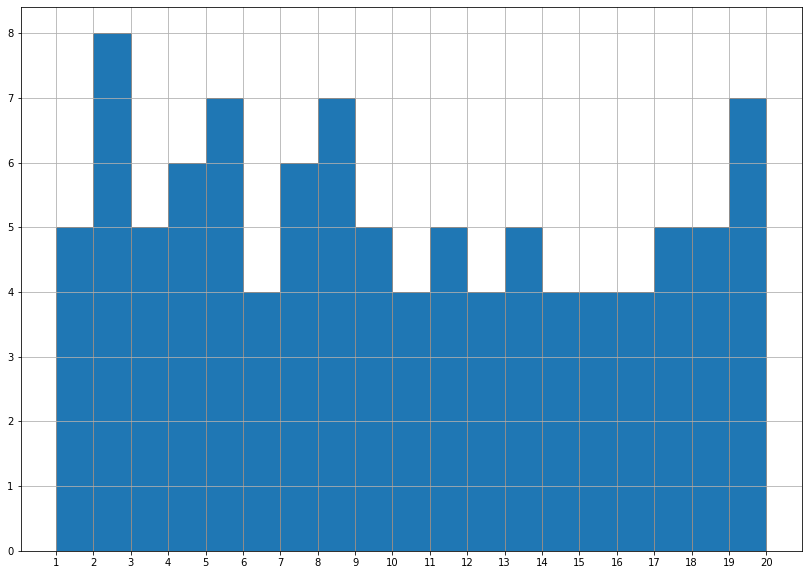

In [7]:
plt.hist(myrand, bins = list(range(1,21)), edgecolor='black', linewidth=1)
plt.xticks(list(range(1,21)))
plt.grid(True)
plt.show()

## 1.2.

In [8]:
rs = np.random.RandomState(1) #I know np updated its rng at some point, but I'm too accustomed to legacy syntax. Sorry!
goodrand = np.random.random_integers(1, 20, 100)
goodrand.shape

C:\Users\kuzne\AppData\Local\Temp\ipykernel_18020\2405800667.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
  goodrand = np.random.random_integers(1, 20, 100)


(100,)

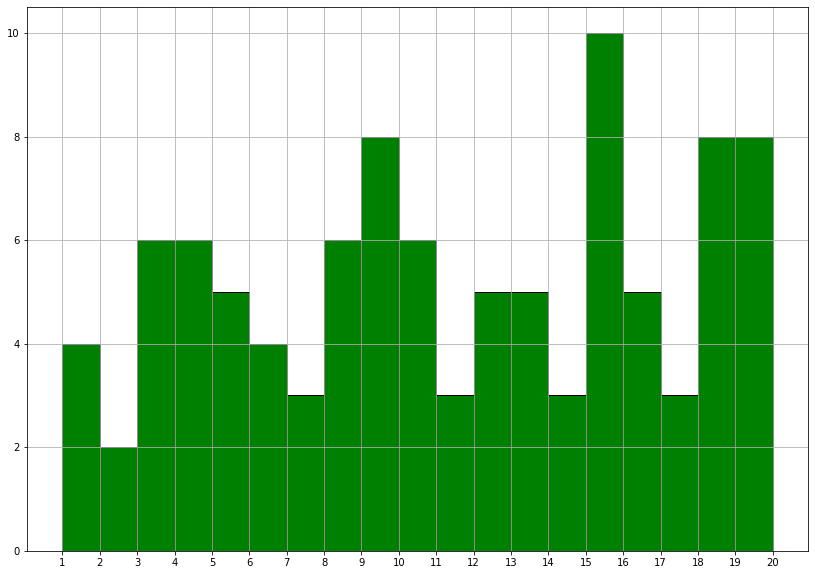

In [9]:
plt.hist(goodrand, bins = list(range(1,21)), edgecolor='black', color = 'green', linewidth=1)
plt.xticks(list(range(1,21)))
plt.grid(True)
plt.show()

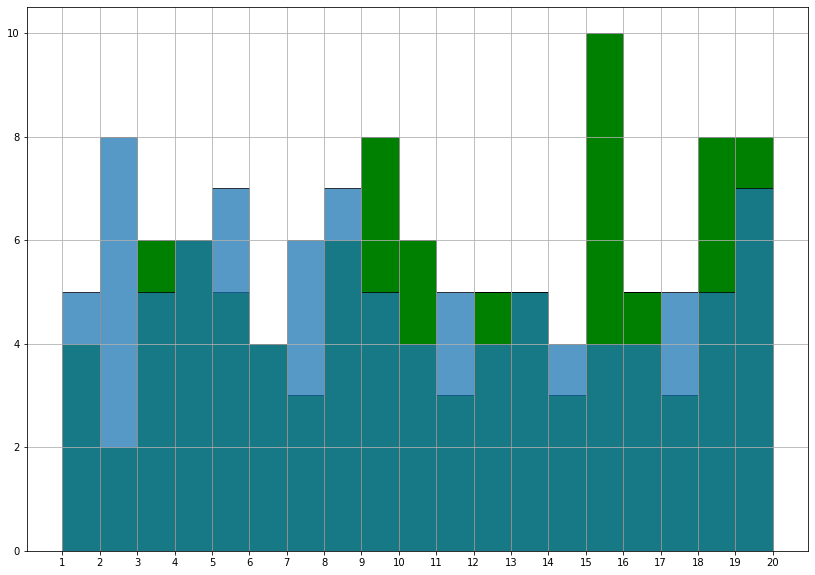

In [10]:
#plot both histograms
plt.hist(goodrand, bins = list(range(1,21)), edgecolor='black', color = 'green', linewidth=1)
plt.hist(myrand, bins = list(range(1,21)), edgecolor='black', linewidth=1, alpha = 0.75)
plt.xticks(list(range(1,21)))
plt.grid(True)
plt.show()

In [20]:
goodrand

array([16,  4,  3,  9,  8,  1, 18, 18,  4, 11,  4,  7, 13, 20, 10,  5, 14,
        8,  2,  5, 12,  5, 17, 13,  4,  9, 11,  5, 10, 10,  8, 13, 13,  5,
        8, 11, 19, 11, 13,  4,  2,  4, 17,  8, 15,  4,  4,  2, 10, 12, 13,
       15, 16,  1,  3, 20,  1, 16,  6, 18, 10, 12,  1,  5, 10, 18,  7,  8,
       13,  9, 16,  1, 19, 15,  5,  5, 19, 20, 14,  5,  6, 19, 16, 19,  2,
        7, 17, 16, 18,  4, 16,  7,  2, 19,  2,  6, 19,  1,  9, 16])

In [21]:
myrand

array([ 2,  7,  1,  8,  2,  8, 18,  2,  8,  4,  5,  9,  4,  5, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 18, 16, 14, 12, 10,  8,  6,  4,  2,  1,  3,  5,  7,  9, 11,
       13, 15, 17, 19, 17, 13, 11,  7,  5,  3,  2,  1, 11,  3, 13,  5, 15,
        7, 17,  9, 19,  2, 20, 12,  4, 14,  6, 16,  8, 18, 10,  1])

### We state w/o proof that the theoretical values of mean and std are 10.5 and abt 5.766 respectively.

In [37]:
popmean = (20+1)/2
popstd = ((20**2-1)/12)**(.5)
popskew = 0
popkurt = -6/5*(20**2+1)/(20**2-1) #here we use excess kurtosis (Fisher's sense)
popmean, popstd, popskew, popkurt

(10.5, 5.766281297335398, 0, -1.2060150375939849)

In [35]:
#compare the moments
print(f'The hand-drawn sample has a mean of {myrand.mean():.3f}, while the mean for the numpy RNG is {goodrand.mean():.3f}. The absolute difference is {np.abs(myrand.mean()-goodrand.mean()):.3f}. The modulus of the relative differnce wrt numpy RNG is {np.abs(myrand.mean()-goodrand.mean())/goodrand.mean():.3f}, or {np.abs(myrand.mean()-goodrand.mean())/goodrand.mean()*100:.1f}%')
print(f'The relative deviations wrt the population mean are {np.abs(myrand.mean()-popmean)/popmean:.3f} and {np.abs(goodrand.mean()-popmean)/popmean:.3f} for hand-drawn and numpy RNG respectively.')

The hand-drawn sample has a mean of 9.610, while the mean for the numpy RNG is 10.010. The absolute difference is 0.400. The modulus of the relative differnce wrt numpy RNG is 0.040, or 4.0%
The relative deviation wrt the population mean and std are 0.085 and 0.047 for hand-drawn and numpy RNG respectively.


In [36]:
#compare the moments
print(f'The hand-drawn sample has std of {myrand.std():.3f}, while the std for the numpy RNG is {goodrand.std():.3f}. The absolute difference is {np.abs(myrand.std()-goodrand.std()):.3f}. The modulus of the relative differnce wrt numpy RNG is {np.abs(myrand.std()-goodrand.std())/goodrand.std():.3f}, or {np.abs(myrand.std()-goodrand.std())/goodrand.std()*100:.1f}%')
print(f'The relative deviations wrt the population std are {np.abs(myrand.std()-popstd)/popstd:.3f} and {np.abs(goodrand.std()-popstd)/popstd:.3f} for hand-drawn and numpy RNG respectively.')

The hand-drawn sample has std of 5.702, while the std for the numpy RNG is 5.863. The absolute difference is 0.160. The modulus of the relative differnce wrt numpy RNG is 0.027, or 2.7%
The relative deviations wrt the population std are 0.011 and 0.017 for hand-drawn and numpy RNG respectively.


In [42]:
#compare the moments
print(f'The hand-drawn sample has skewness of {stats.skew(myrand):.3f}, while the skewness for the numpy RNG is {stats.skew(goodrand):.3f}. The absolute difference is {np.abs(stats.skew(myrand)-stats.skew(goodrand)):.3f}. The modulus of the relative differnce wrt numpy RNG is {np.abs(stats.skew(myrand)-stats.skew(goodrand))/stats.skew(goodrand):.3f}, or {np.abs(stats.skew(myrand)-stats.skew(goodrand))/stats.skew(goodrand)*100:.1f}%')
print(f'The absolute deviations wrt the population skewness are {np.abs(stats.skew(myrand)-popskew):.3f} and {np.abs(stats.skew(goodrand)-popskew):.3f} for hand-drawn and numpy RNG respectively.')
#relative would diverge

The hand-drawn sample has skewness of 0.199, while the skewness for the numpy RNG is 0.123. The absolute difference is 0.076. The modulus of the relative differnce wrt numpy RNG is 0.613, or 61.3%
The absolute deviations wrt the population skewness are 0.199 and 0.123 for hand-drawn and numpy RNG respectively.


In [51]:
#compare the moments
print(f'The hand-drawn sample has kurtosis of {stats.kurtosis(myrand):.3f}, while the kurtosis for the numpy RNG is {stats.kurtosis(goodrand):.3f}. The absolute difference is {np.abs(stats.kurtosis(myrand)-stats.kurtosis(goodrand)):.3f}. The modulus of the relative differnce wrt numpy RNG is {np.abs(np.abs(stats.kurtosis(myrand)-stats.kurtosis(goodrand))/stats.kurtosis(goodrand)):.3f}, or {np.abs(np.abs(stats.kurtosis(myrand)-stats.kurtosis(goodrand))/stats.kurtosis(goodrand)*100):.1f}%')
print(f'The relative deviations wrt the population kurtosis are {np.abs(np.abs(stats.kurtosis(myrand)-popkurt)/popkurt):.3f} and {np.abs(np.abs(stats.kurtosis(goodrand)-popkurt)/popkurt):.3f} for hand-drawn and numpy RNG respectively.')

The hand-drawn sample has kurtosis of -1.184, while the kurtosis for the numpy RNG is -1.272. The absolute difference is 0.088. The modulus of the relative differnce wrt numpy RNG is 0.069, or 6.9%
The relative deviations wrt the population kurtosis are 0.018 and 0.055 for hand-drawn and numpy RNG respectively.


check average, standard deviation, skewness, kurtosis and autocorrelations and apply any other statistics that you know)

In [72]:
def autocorr(y):
    x = y-y.mean()
    result = np.correlate(x, x, mode='full')
    result = result / result[np.argmax(result)]
    return result[int(np.floor(result.size/2)):]

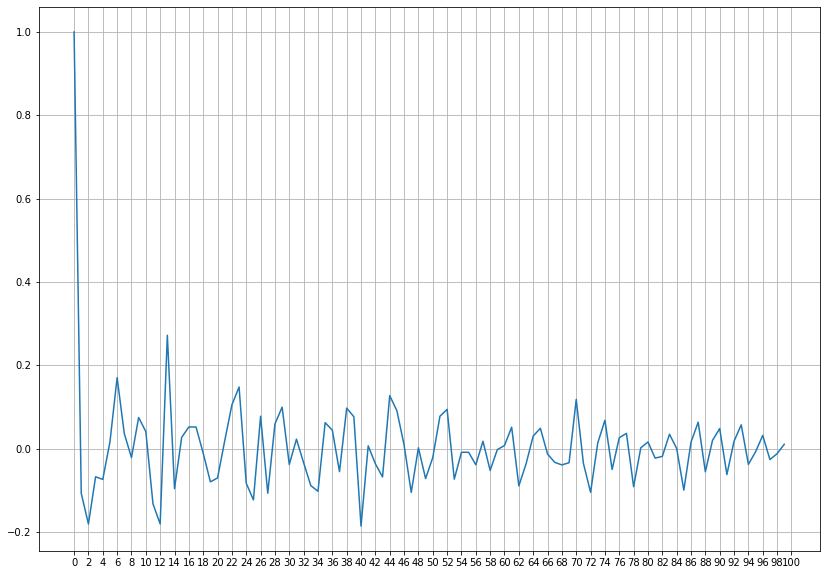

In [79]:
plt.plot(autocorr(goodrand))
plt.xticks(list(range(0,101, 2)))
plt.grid(True)
plt.show()

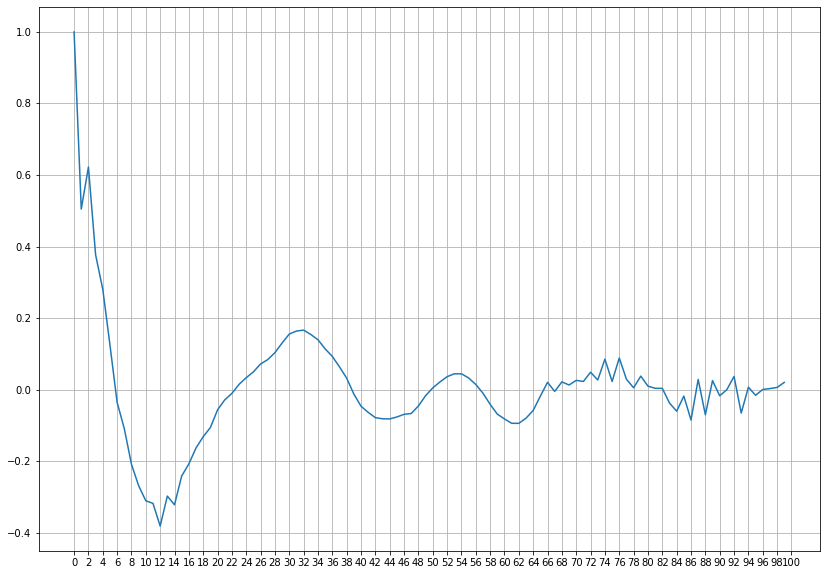

In [80]:
plt.plot(autocorr(myrand))
plt.xticks(list(range(0,101, 2)))
plt.grid(True)
plt.show()

### Now apply Kolmogorov-Smirnov test of equality of distributions

In [82]:
stats.ks_2samp(myrand, goodrand) #NULL is identical distributions

KstestResult(statistic=0.05, pvalue=0.9996892272702655)

In [86]:
stats.kstest(myrand, cdf = 'randint', args = (1, 20))

KstestResult(statistic=0.06999999999999995, pvalue=0.6846706791645856)

In [88]:
stats.kstest(goodrand, cdf = 'randint', args = (1, 20))

KstestResult(statistic=0.1021052631578947, pvalue=0.2318088806613765)

## Conclusion
It would appear that I have generated a remarkably good approximation of the uniform random distribution - so much so that the KS test cannot refute the null hypothesis, and all but one moments are very close (the skewness is way off, though). However, the method of generation of the sequence (after the first numbers that are nothing but the digits of Euler's number it's just sequences from 1 to 20 and from 20 to 1 of certain numbers, like evens or primes) shows itself in the detected autocorrelation levels that are quite notably higher than those of the numpy inbuilt RNG. This could have likely been averted if I were to shuffle the numbers upon generating them.

# Problem 2 (Direct Sampling, 3 points)

In this problem we are generally interested in sampling from an arbitrary probability distribution
function (PDF). Assume that P(x) is a PDF and we are interested in sampling random variables from
it, thus, it should be normalised. Answer the following questions:
1. What is the method of inverse transform sampling from P(x)?
2. Get the formulae for sampling of random variables for the following distributions
$$P(x) \propto e^{-\lambda{x}} \mid x \in [0; \infty); \lambda>0$$
$$P(x) \propto e^{-x^2} \mid x \in \mathbb{R}$$
$$P(x) \propto x^{-\gamma} \mid x \in [1; \infty); \gamma>1$$
Hint: First you need to normalize P(x).
3. Write a code and create a sufficient number of random variables from the distributions above.
(Set the parameters to λ = 1 and γ = 3 where needed).
4. Show that your procedure works properly by plotting the histogram of your produced random variables beside the original function P(x).



## 2.1.

Inverse transform sampling works thusly: let us assume we wish to obtain a sample of $X$, of CDF $F_x$. We know that $F_x: \Omega \rightarrow [0;1]$, where $\Omega$ is the state space of PDF. We can associate the image of the CDF with a uniformly distributed random variable. If $F_x$ is readily invertible, we then may sample from the uniform distribution $U$ defined on $[0;1]$ and then recover the samples of the desired distribution by applying the inverse map $F_x^{-1}: [0;1] \rightarrow \Omega$. Below is a drawing that crudely illustrates this:
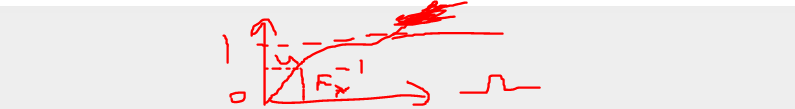

## 2.2.

Let us normalise the distributions by straightforward itnegration. 

A)
$$C\int_{0}^{\infty}e^{-\lambda{x}}dx = 1$$
$$-\frac{Ce^{-\lambda{x}}}{\lambda}\mid_0^{\infty} = 1$$
$$\frac{C}{\lambda} = 1$$
$$C = \lambda$$

We have recovered the well-known result regarding the Laplace transform of a constant. 

Considering the above, 
$$P(x) = \lambda{}e^{-\lambda{x}} \mid x \in [0; \infty); \lambda>0$$

Find CDF:
$$F_x(x) = \int_{0}^{x}\lambda{}e^{-\lambda{y}}dy = \int_{0}^{x}e^{-\lambda{y}}d\lambda{}y = -e^{-\lambda{}y}\mid_{0}^{x} = e^{-\lambda{}y}\mid_{x}^{0} = e^{-\lambda{}x}(e^{\lambda{}x} - 1)$$

Of which the inverse is $F_x^{-1}$ is easily recovered (the algebraic procedure is quite laborious to write in latex, and I therefore choose to omit it, as it poses no problems): $F_x^{-1}(u) = -\frac{\ln(1-u)}{\lambda}$

B)
$$C\int_{-\infty}^{\infty}e^{-x^2}dx = 1$$
$$C\sqrt{\pi} = 1$$
$$C = \frac{1}{\sqrt{\pi}}$$

This is a well-known quantity, and one may recover it in a variety of ways, for instance, by recognizing $g(t) = (\int_0^\infty{e^{-x^2}}dx)^2$, which generates half of a square of the demanded function when evaluated at infinity, and employing Leibniz's integral rule and the substitution of Laplace. I do not give the solution here, as it would be unduly laborious to transfer, but I have it on paper and will provide on demand. Such a method, alas, is less elegant than the classical method of Poisson.

Considering the above, 
$$P(x) = \frac{1}{\sqrt{\pi}}e^{-x^2} \mid x \in \mathbb{R}$$

Find CDF:
$$F_x(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{\pi}}e^{-y^2}dy $$

This quantity is intractable except by special functions for which no analytic inverse exists; we will have to employ the transform of Box and Muller. 
Of which the inverse is $F_x^{-1}$ is easily recovered (the algebraic procedure is quite laborious to write in latex, and I therefore choose to omit it, as it poses no problems): $F_x^{-1}(u) = -\frac{\ln(1-u)}{\lambda}$

C)

$$C\int_{1}^{\infty}x^{-\gamma}dx = 1$$
$$C \frac{x^{1-\gamma}}{1-\gamma}\mid_1^{\infty} = 1$$
$$\frac{C}{\gamma-1} = 1$$
$$C = \gamma - 1$$


Considering the above, 
$$P(x) = (\gamma-1)x^{-\gamma} \mid x \in [1; \infty); \gamma>1$$

Find CDF:
$$F_x(x) = \int_{1}^{x}(\gamma-1)y^{-\gamma}dy = 1 - \frac{x}{x^\gamma} = 1 - x^{1-\gamma}$$

Here the results of the integration carried out in the normalisation step was used, as the analytic antiderivative stays the same up to a multiplicative constant.

The inverse is straightforwardly obtained: if $y = 1-x^{1-\gamma}$, then $x = (1-y)^{\frac{1}{1-\gamma}}$.

In [126]:
def invA(x, lamb): 
    return (-np.log(1-x)/lamb)
def invC(x, gamma): 
    return np.power(1-x, 1/(1-gamma))
def gendis(kind = 'A', length = 1000, param = 0):
    funcs = {'A': invA, 'C': invC}
    if kind == 'B':
        return genbm(length)
    else:
        out = np.random.random_sample(length)
        return funcs[kind](out, param)
def genbm(length):
    a = np.random.random_sample(length)
    b = np.random.random_sample(length)
    z1 = np.sqrt(-2*np.log(a))*np.cos(2*np.pi*b)
    z2 = np.sqrt(-2*np.log(a))*np.sin(2*np.pi*b)
    return np.concatenate([z1,z2][:length+1])

In [129]:
def pdfA(x, lamb):
    return lamb*np.exp(-lamb*x)
def pdfB(x):
    return np.exp(-np.power(x,2)/np.sqrt(np.pi))
def pdfC(x,gamma):
    return (gamma-1)*np.power(x,-gamma)

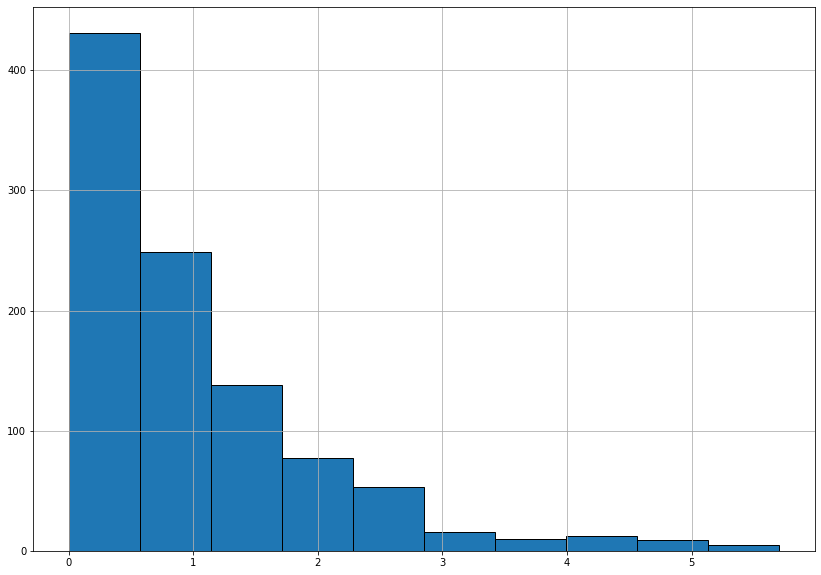

In [133]:
plt.hist(gendis('A', param = 1), edgecolor='black', linewidth=1)
plt.grid(True)
plt.show()

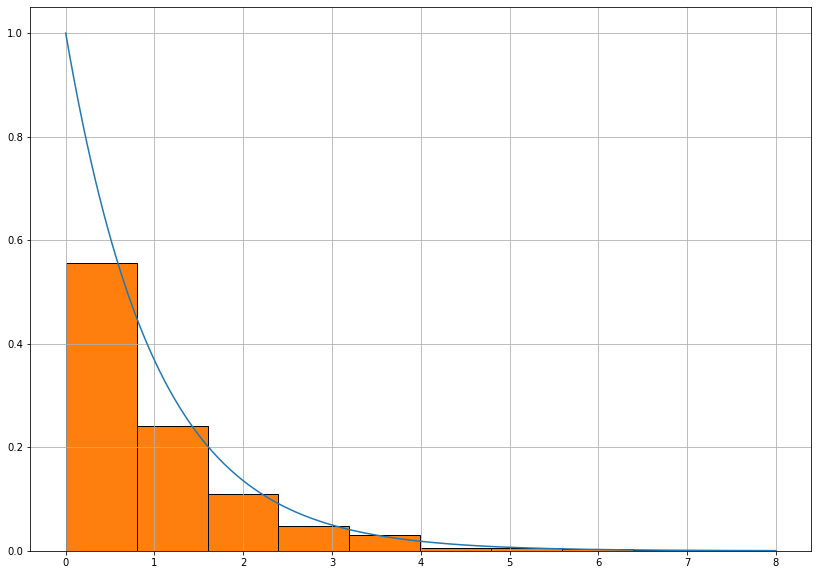

In [136]:
plt.plot(np.linspace(0,8, 1000), pdfA(np.linspace(0,8, 1000), 1))
a = gendis('A', param = 1)
plt.hist(a, edgecolor='black', linewidth=1, weights=np.zeros_like(a) + 1. / a.size)
plt.grid(True)
plt.show()

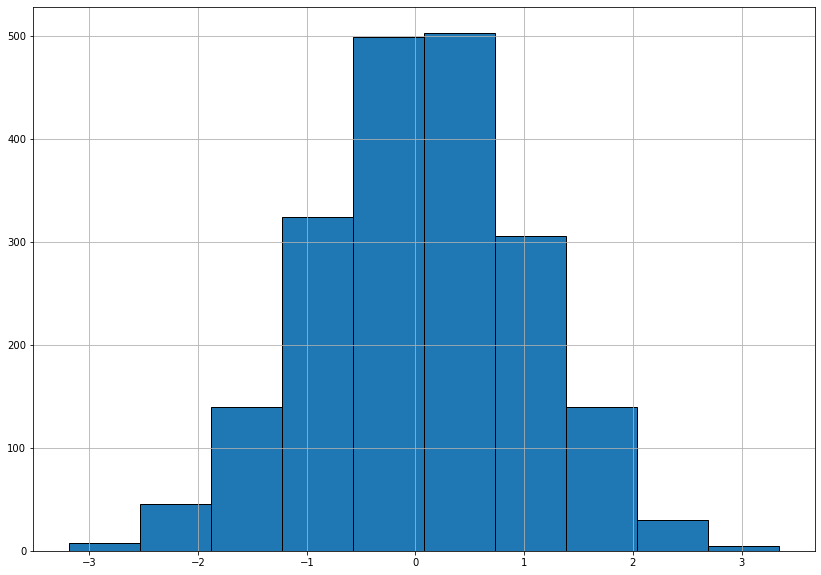

In [118]:
plt.hist(gendis('B', param = 1), edgecolor='black', linewidth=1)
plt.grid(True)
plt.show()

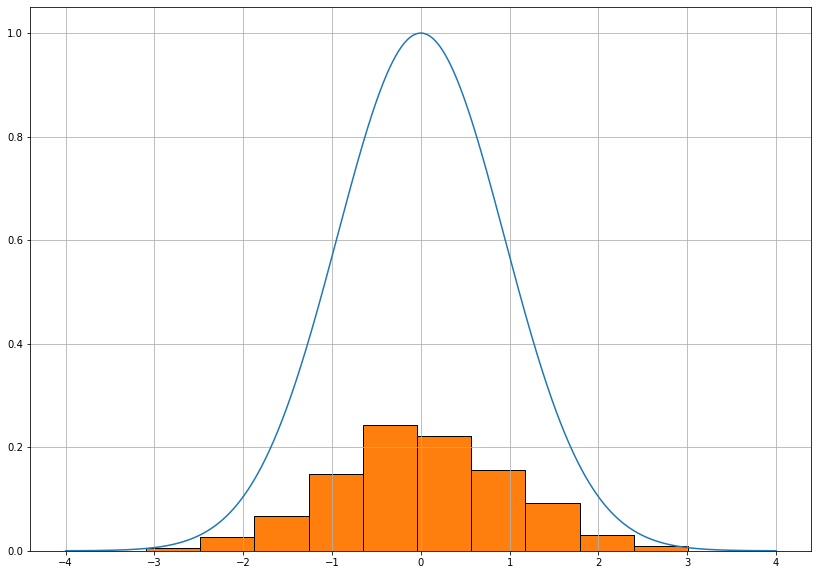

In [139]:
plt.plot(np.linspace(-4,4, 1000), pdfB(np.linspace(-4,4, 1000)))
a = gendis('B', param = 1)
plt.hist(a, edgecolor='black', linewidth=1, weights=np.zeros_like(a) + 1. / a.size)
plt.grid(True)
plt.show()

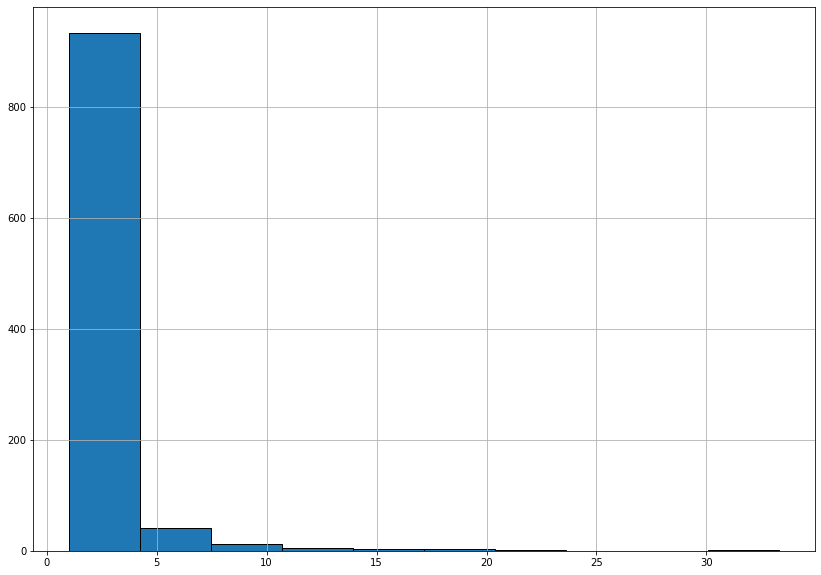

In [128]:
plt.hist(gendis('C', param = 3), edgecolor='black', linewidth=1)
plt.grid(True)
plt.show()

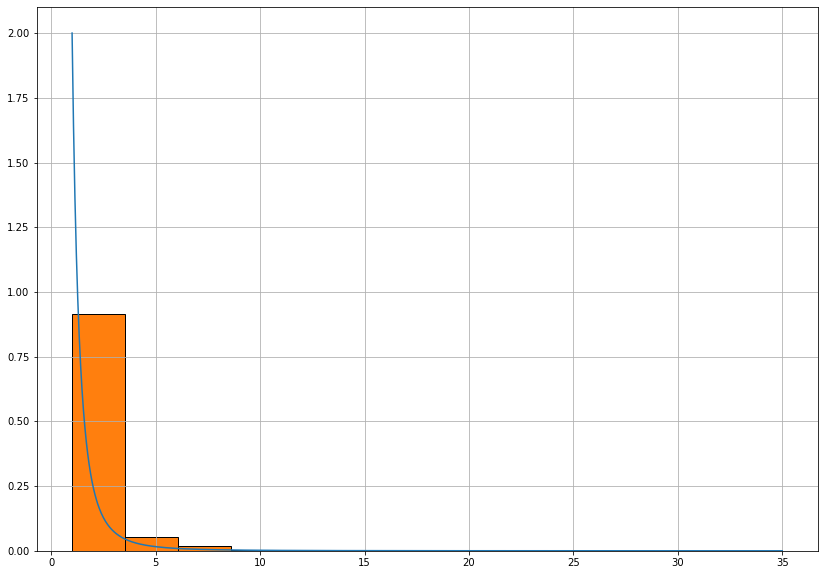

In [143]:
plt.plot(np.linspace(1,35, 1000), pdfC(np.linspace(1,35, 1000), 3))
a = gendis('C', param = 3)
plt.hist(a, edgecolor='black', linewidth=1, weights=np.zeros_like(a) + 1. / a.size)
plt.grid(True)
plt.show()

# Problem 3 (Transformation of Probability Density, 2 points)

The unit disk is given by polar coordinates R ∈ [0, 1] and θ ∈ [0, 2π). Write a procedure that uniformly
samples a random point on the disk using two independent random variables ξ1 and ξ2 chosen uniformly
from the interval [0, 1].




The totality of the probability would be obtained from the probability density thusly: $\int_\Omega{f_{xy}}(x,y)dxdy$. In some other coordinates Z,W it would instead be $\int_{\Omega_1}{f_{zw}}(z,w)dzdw$. We will consider $\Omega = \Omega_1$, as both joints are taken as continuous, and the cardinality of real numbers allows for rather arbitrary reshapes. We will also demand that the total probability, intuitevely analogous to mass of a complex lamina, is conserved. Thus we treat the mapping from $x,y$ to $z,w$ as a change of variables in an integral, allowing us to apply the same line of thinking and the known result of $f_{zw} = f_{xy}|J|$, J being the Jacobian of this transformation: $J_{ij} = \frac{dX_i}{dV_j}$, X and V being vectors of variables.

We now construct new variables from $x,y$ (I use these letters instead of the abominable $\xi$):
$$r = \sqrt{x^2+y^2}$$
$$\Theta = \arctan{\frac{y}{x}}$$

Therefore, by way of trivial computation, $|J| = \frac{1}{\sqrt{x^2+y^2}}$...

### At this point, I've realised that while I have obtained the way of getting a joint PDF, that would get me nowehre, as the range of R would not be enforced (say, if we get by chance x=1=y, radius would be square root of two). I have to settle for a less pretty idea.

We desire the sampling to be proportional to area and not radial distance. Taking that the area is proportional to square of radial distance into consideration, we sample as follows:

1. Sample the angle uniformly: $\Theta = 2\pi{y}$
2. Sample the square of radius uniformly: $R = \sqrt{x}$
3. ???
4. Profit

In [153]:
length = 5000
x = np.random.random_sample(length)
y = np.random.random_sample(length)
theta = 2*np.pi*y
r = np.sqrt(x)

In [154]:
x1 = r * np.cos(theta)
y1 = r * np.sin(theta)

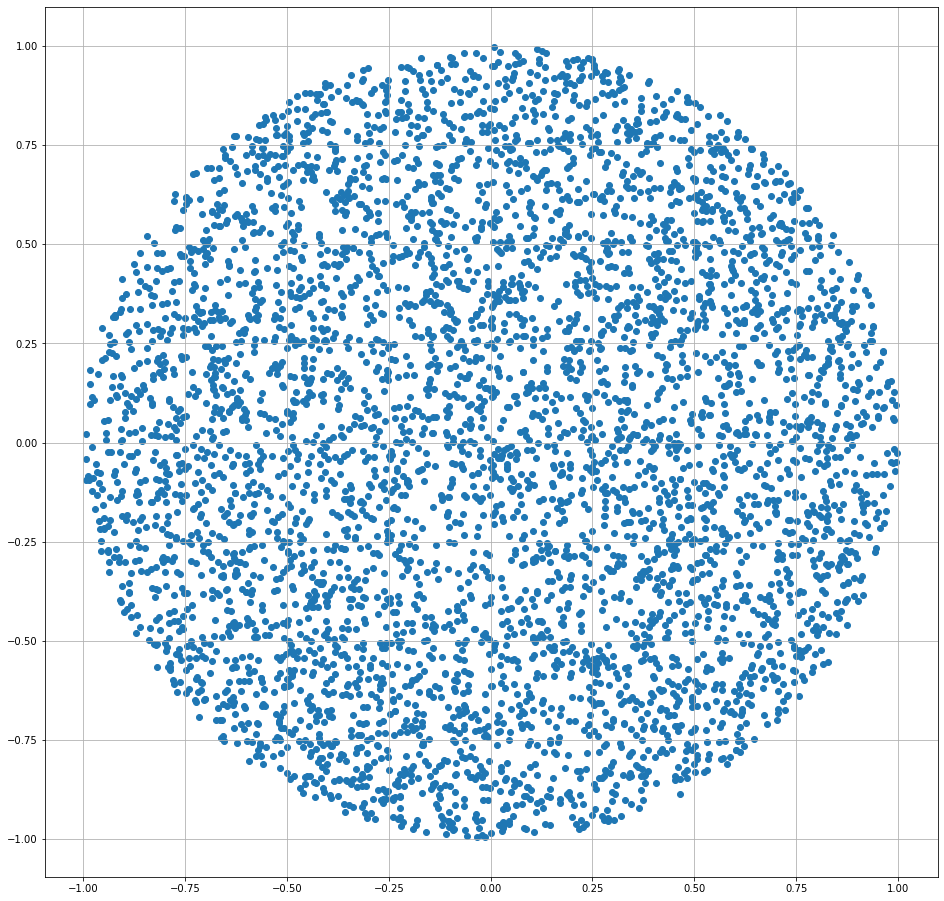

In [267]:
plt.rcParams["figure.figsize"] = (16,16) #I am THIS reluctant to use actual subplots interface
plt.scatter(x1,y1)
plt.grid(True)
plt.show()

In [268]:
plt.rcParams['figure.figsize'] = [14, 10]

# Problem 4 (Correlated Random Variables, 3 points)

Lets assume we have PDF f(x1) = 1/2π and g(x2) = 1/2π, where both x1 and x2 are in [0, 2π]. In a
specific problem, we are interested in two sets of dependent random variables from f(x1) and g(x2).
Imagine set1 as the price of a product, sampled from f(x1) and set2 as the price of the constituent materials of a product, sampled from g(x2). Obviously when the price of a constituent material is high, we expect that the final price of that specific product will be high as well.
1. Design a sampling procedure that provides two set of maximally correlated variables.
2. How we can reduce the correlation in these two sets from maximum r = 1 to minimum r = −1?
3. Write a code to apply the procedure you designed and plot x1 v.s. x2 for three specific cases r = 1, 0, −1.


In blatant disobedience of the tasks 1-2, we will consider an arbitrary correlation r straight away. Knowing r and both PDFs, we can easily recover the covariance matrix $\Sigma$. We take this matrix to be Hermitian.

Since it is Hermitian, it admits a Cholesky factorization which must carry the meaning of an equivalent to std. To be fair, I'm making a wild guess here and hoping it works. Let $L$ be the Cholesky factor. 
Now let us sample from some uniform distribution $x$ and construct $y = a+Lx$. By writing out the characteristic function (which I am not doing here but will provide at the first demand, as I have it on paper), one sees that upon substituting $y$ instead of $x$ the general form of uniform distribution is maintained, except the variance is multiplied by the square of L, and the mean is shifted by a AND multiplied by L. I do not wish to have anything to do with this weird mean behavior, so I will pre-center the raw samples and restore the mean afterwards by adding a and also impose initial unit variance.

In [162]:
def getsig(r, sigx, sigy):
    return np.array([[sigx**2, sigx*sigy*r],
                     [sigx*sigy*r, sigy**2]])

In [190]:
def sample(length):
    return np.random.random_sample(length)-.5*(2*np.sqrt(3)) #ensures 1 variance and 0 mean

In [344]:
def samplecorr(r, x, y, mux, muy, sigx, sigy, minx, miny, length=1000): #x, y - functions
    xraw, yraw = x(length), y(length)
    #print(xraw, yraw)
    #xraw, yraw = xraw - mux, yraw - muy
    sigma = getsig(r, sigx, sigy)
    #print(sigma)
    xvect = np.array([xraw, yraw])
    #try:
    #    L = np.linalg.cholesky(sigma)
    #except LinAlgError:
    u, s, vh = np.linalg.svd(sigma)
    s = np.diag(s)
    L = u@np.sqrt(s)
    mus = np.array([mux,muy]).reshape(2,1)
    z = mus+L@xvect
    #something went clearly wrong and needs crutches to make mean and std all right. I do not understand why - the theory seemed very good. no time to fix properly
    #ah! I must move so that the minimum rests at 0
    z = z+np.array([minx,miny]).reshape(2,1) - np.array([z[0].min(),z[1].min()]).reshape(2,1)
    return z*sig/z.std()

In [345]:
np.array([[1,2],[3,4]])@sample(2)

array([-3.11656664, -7.23719671])

In [346]:
sig = np.pi/np.sqrt(3)

In [347]:
r1 = samplecorr(1,sample,sample,np.pi,np.pi,sig,sig,0, 0, 1000)

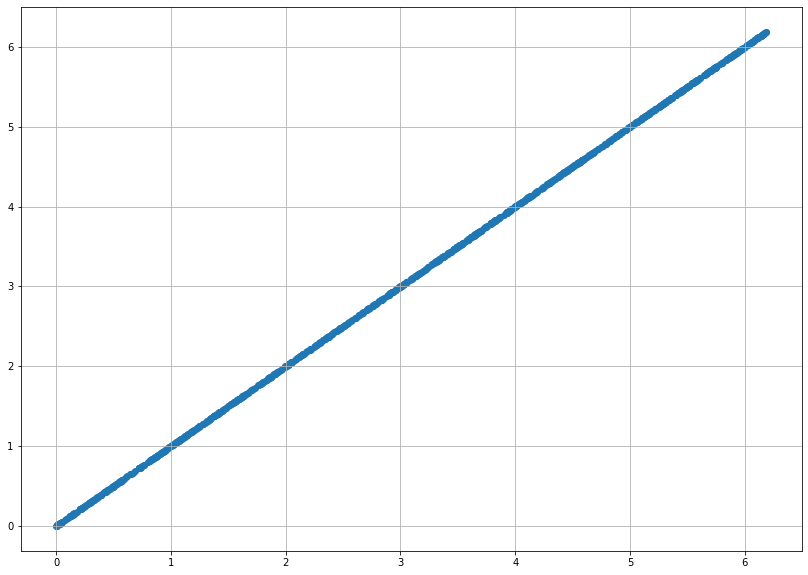

In [348]:
plt.scatter(r1[0], r1[1])
plt.grid(True)
plt.show()

In [349]:
r0 = samplecorr(0,sample,sample,np.pi,np.pi,sig,sig,0,0,1000)

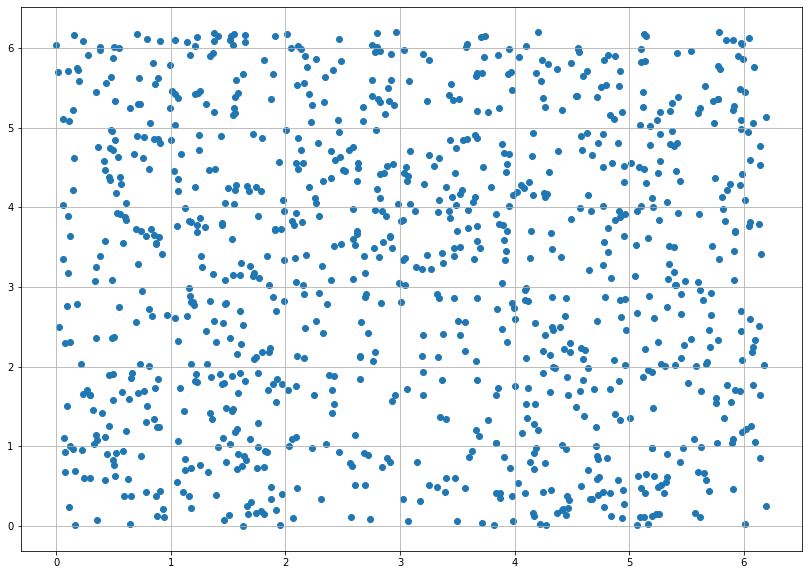

In [350]:
plt.scatter(r0[0], r0[1])
plt.grid(True)
plt.show()

In [351]:
rn1 = samplecorr(-1,sample,sample,np.pi,np.pi,sig,sig,0,0,1000)

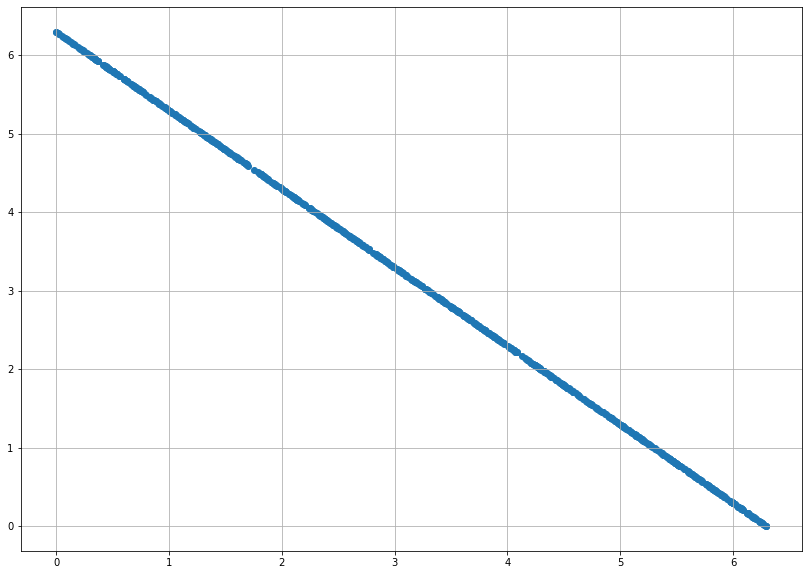

In [352]:
plt.scatter(rn1[0], rn1[1])
plt.grid(True)
plt.show()